In [ ]:
print("""
Name: FRANK EVIN YAMI
ID : 0232112159
""")


Name: FRANK EVIN YAMI
ID : 0232112159



# **TRAUMATIC BRAIN INJURY IN USA**

## **Overview of TBI data sets**

*   This dataset was created by extracting tables from a PDF document. It serves as an excellent case study for cleaning and structuring information obtained from PDF files. The process likely involved using the pdftools package, developed by *rOpenSci*, to scrape and organize the tabular data from the PDF source.

*   This is the link to the data: https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-03-24/readme.md.

We have 3 data sets named :

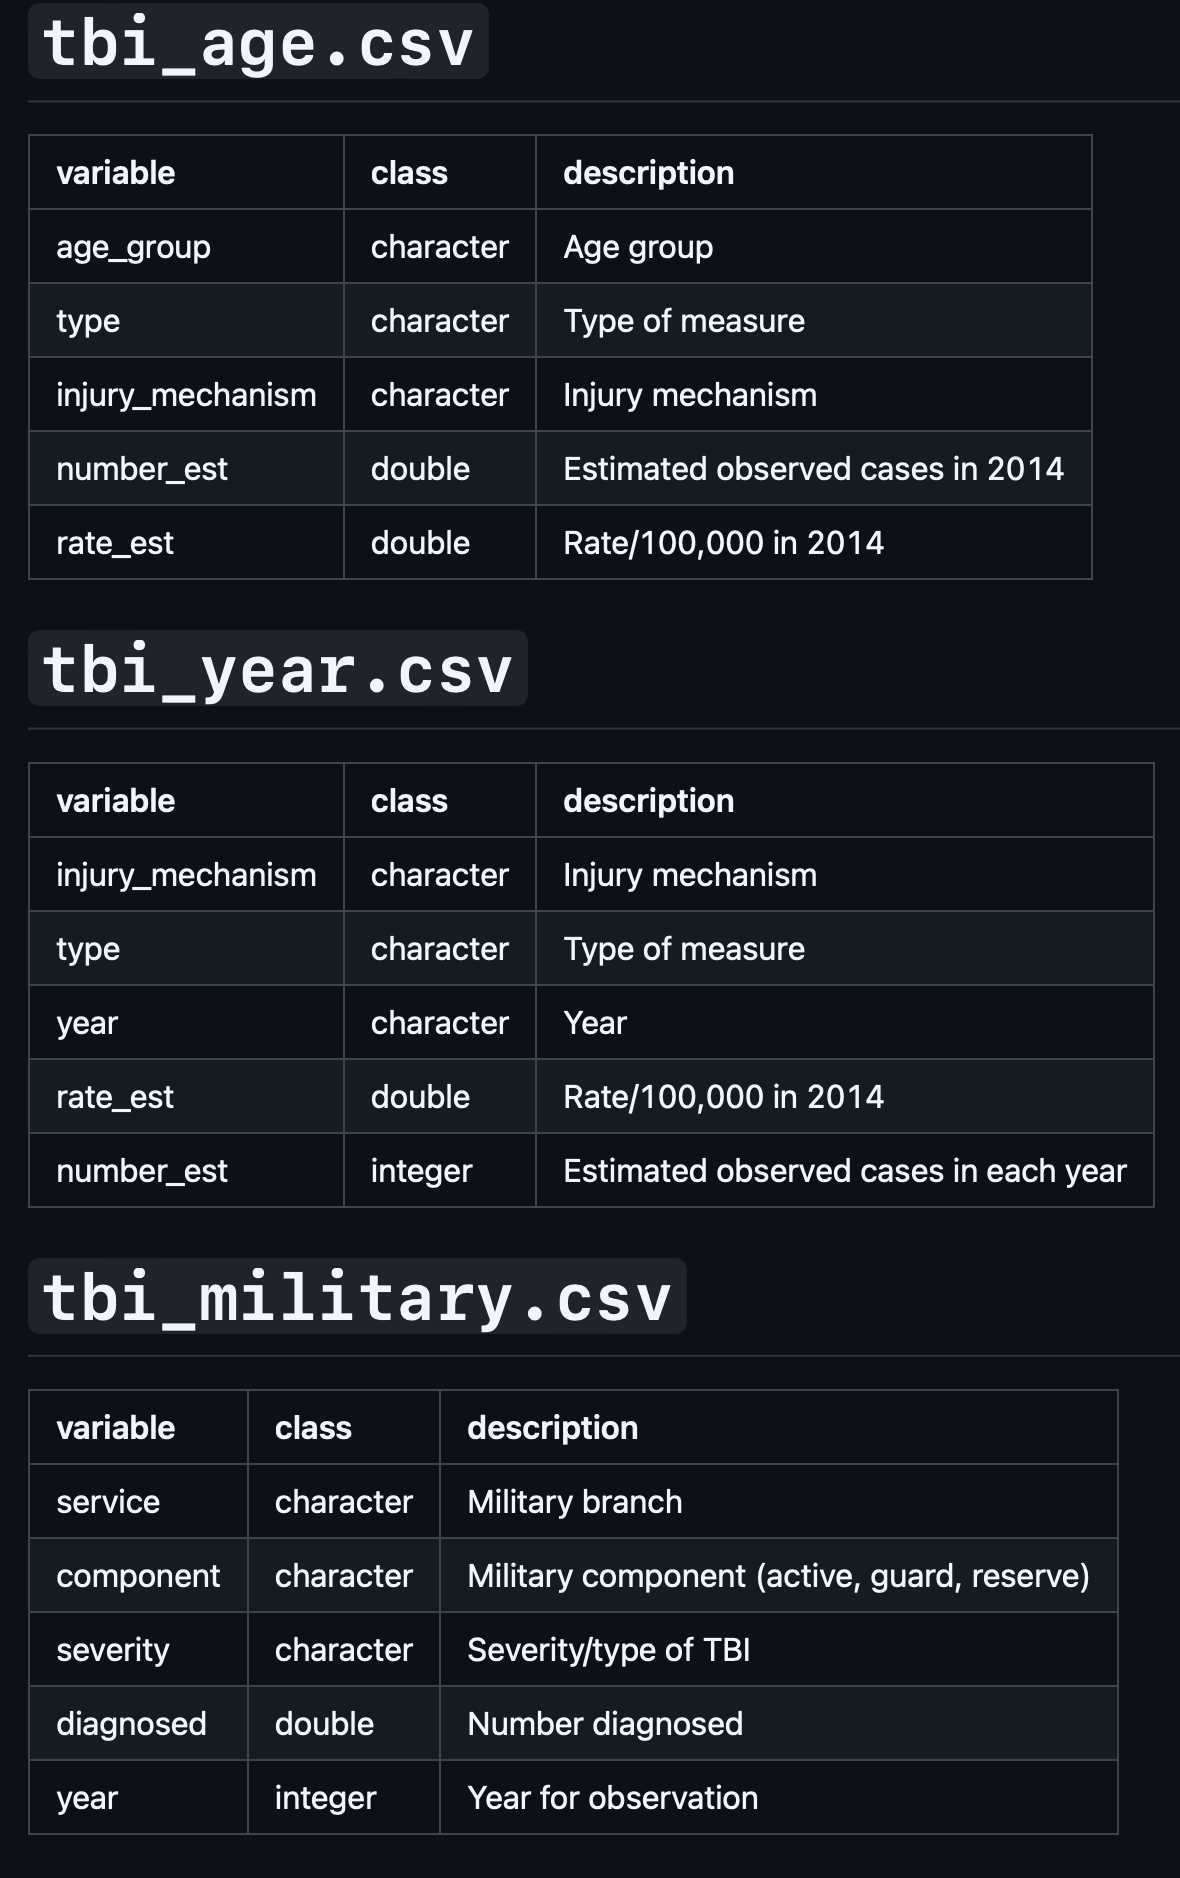




## 0. **LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **1.DATA LOADING**

In [2]:
# Load the uploaded files and  Read the CSV files into DataFrames
age = pd.read_csv('/content/tbi_age.csv')
military = pd.read_csv('/content/tbi_military.csv')
year = pd.read_csv('/content/tbi_year.csv')

# Display the structure and first few rows of each DataFrame to understand their contents
age_info = age.info(), age.head()
military_info = military.info(), military.head()
year_info = year.info(), year.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_group         231 non-null    object 
 1   type              231 non-null    object 
 2   injury_mechanism  231 non-null    object 
 3   number_est        220 non-null    float64
 4   rate_est          220 non-null    float64
dtypes: float64(2), object(3)
memory usage: 9.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   service    450 non-null    object 
 1   component  450 non-null    object 
 2   severity   450 non-null    object 
 3   diagnosed  438 non-null    float64
 4   year       450 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 

In [ ]:
age_info

(None,
   age_group                        type  \
 0      0-17  Emergency Department Visit   
 1      0-17  Emergency Department Visit   
 2      0-17  Emergency Department Visit   
 3      0-17  Emergency Department Visit   
 4      0-17  Emergency Department Visit   
 
                                     injury_mechanism  number_est  rate_est  
 0                              Motor Vehicle Crashes     47138.0      64.1  
 1                                Unintentional Falls    397190.0     539.8  
 2     Unintentionally struck by or against an object    229236.0     311.6  
 3  Other unintentional injury, mechanism unspecified     55785.0      75.8  
 4                              Intentional self-harm         NaN       NaN  )

In [ ]:
year_info

(None,
         injury_mechanism                        type  year  rate_est  \
 0  Motor vehicle crashes  Emergency Department Visit  2006      85.3   
 1  Motor vehicle crashes  Emergency Department Visit  2007      83.8   
 2  Motor vehicle crashes  Emergency Department Visit  2008      83.9   
 3  Motor vehicle crashes  Emergency Department Visit  2009      88.7   
 4  Motor vehicle crashes  Emergency Department Visit  2010      95.3   
 
    number_est  
 0    254793.0  
 1    252459.0  
 2    254391.0  
 3    270240.0  
 4    292942.0  )

In [ ]:
military_info

(None,
   service component          severity  diagnosed  year
 0    Army    Active       Penetrating      189.0  2006
 1    Army    Active            Severe      102.0  2006
 2    Army    Active          Moderate      709.0  2006
 3    Army    Active              Mild     5896.0  2006
 4    Army    Active  Not Classifiable      122.0  2006)

### Overview of TBI Datasets

#### 1. tbi_age.csv

Columns:
age_group: Age groups (e.g., 0-17).

type: Type of TBI-related visit (e.g., Emergency Department Visit).

injury_mechanism: Cause of injury (e.g., Motor Vehicle Crashes).

number_est: Estimated number of cases.

rate_est: Estimated rate of cases per 100,000 population.

Rows: 231

Key Observations:
Some rows have missing values in number_est and rate_est.

#### 2. tbi_military.csv

Columns:
service: Military service branch (e.g., Army).

component: Service component (e.g., Active).

severity: TBI severity (e.g., Mild, Severe).

diagnosed: Number of diagnosed cases.

year: Year of occurrence.

Rows: 450

Key Observations:

The column diagnosed has some missing values.

#### 3. tbi_year.csv

Columns:
injury_mechanism: Cause of injury.

type: Type of TBI-related visit.

year: Year of occurrence.

rate_est: Estimated rate of cases per 100,000 population.

number_est: Estimated number of cases.

Rows: 216

Key Observations:
Some rows have missing values in number_est.


## 2. **DATA CLEANING**

In [ ]:
# Create a dictionary of DataFrames for convenience
dataframes = {"age": age, "military": military, "year": year}

# Checking for missing values in each dataset
missing_values_summary = {name: df.isnull().sum() for name, df in dataframes.items()}

# Display the percentage of missing data for each column
missing_percentage = {name: (df.isnull().mean() * 100).round(2) for name, df in dataframes.items()}

age.info(), military.info(), year.info(), missing_values_summary, missing_percentage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_group         231 non-null    object 
 1   type              231 non-null    object 
 2   injury_mechanism  231 non-null    object 
 3   number_est        220 non-null    float64
 4   rate_est          220 non-null    float64
dtypes: float64(2), object(3)
memory usage: 9.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   service    450 non-null    object 
 1   component  450 non-null    object 
 2   severity   450 non-null    object 
 3   diagnosed  438 non-null    float64
 4   year       450 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 

(None,
 None,
 None,
 {'age': age_group            0
  type                 0
  injury_mechanism     0
  number_est          11
  rate_est            11
  dtype: int64,
  'military': service       0
  component     0
  severity      0
  diagnosed    12
  year          0
  dtype: int64,
  'year': injury_mechanism     0
  type                 0
  year                 0
  rate_est             0
  number_est          27
  dtype: int64},
 {'age': age_group           0.00
  type                0.00
  injury_mechanism    0.00
  number_est          4.76
  rate_est            4.76
  dtype: float64,
  'military': service      0.00
  component    0.00
  severity     0.00
  diagnosed    2.67
  year         0.00
  dtype: float64,
  'year': injury_mechanism     0.0
  type                 0.0
  year                 0.0
  rate_est             0.0
  number_est          12.5
  dtype: float64})

Here we decide to use imputation to handle misssing values.

In [ ]:
# Impute missing values with the median for numeric columns
for name, df in dataframes.items():
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

# Verify no missing values remain
missing_values_post_imputation = {name: df.isnull().sum().sum() for name, df in dataframes.items()}
missing_values_post_imputation


<ipython-input-14-3cf3e2250c68>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-14-3cf3e2250c68>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

{'age': 0, 'military': 0, 'year': 0}

In [ ]:
# Impute missing 'number_est' in 'tbi_year' using the global median
year['number_est'] = year['number_est'].fillna(year['number_est'].median())

# Confirm no missing values remain in all datasets
missing_values_after_imputation = {
    "tbi_age": age.isnull().sum(),
    "tbi_military": military.isnull().sum(),
    "tbi_year": year.isnull().sum()
}

missing_values_after_imputation


{'tbi_age': age_group           0
 type                0
 injury_mechanism    0
 number_est          0
 rate_est            0
 dtype: int64,
 'tbi_military': service      0
 component    0
 severity     0
 diagnosed    0
 year         0
 dtype: int64,
 'tbi_year': injury_mechanism    0
 type                0
 year                0
 rate_est            0
 number_est          0
 dtype: int64}

## **3. Exploratory Data Analyis**

*a) Trend Analysis for tbi_age dataset*

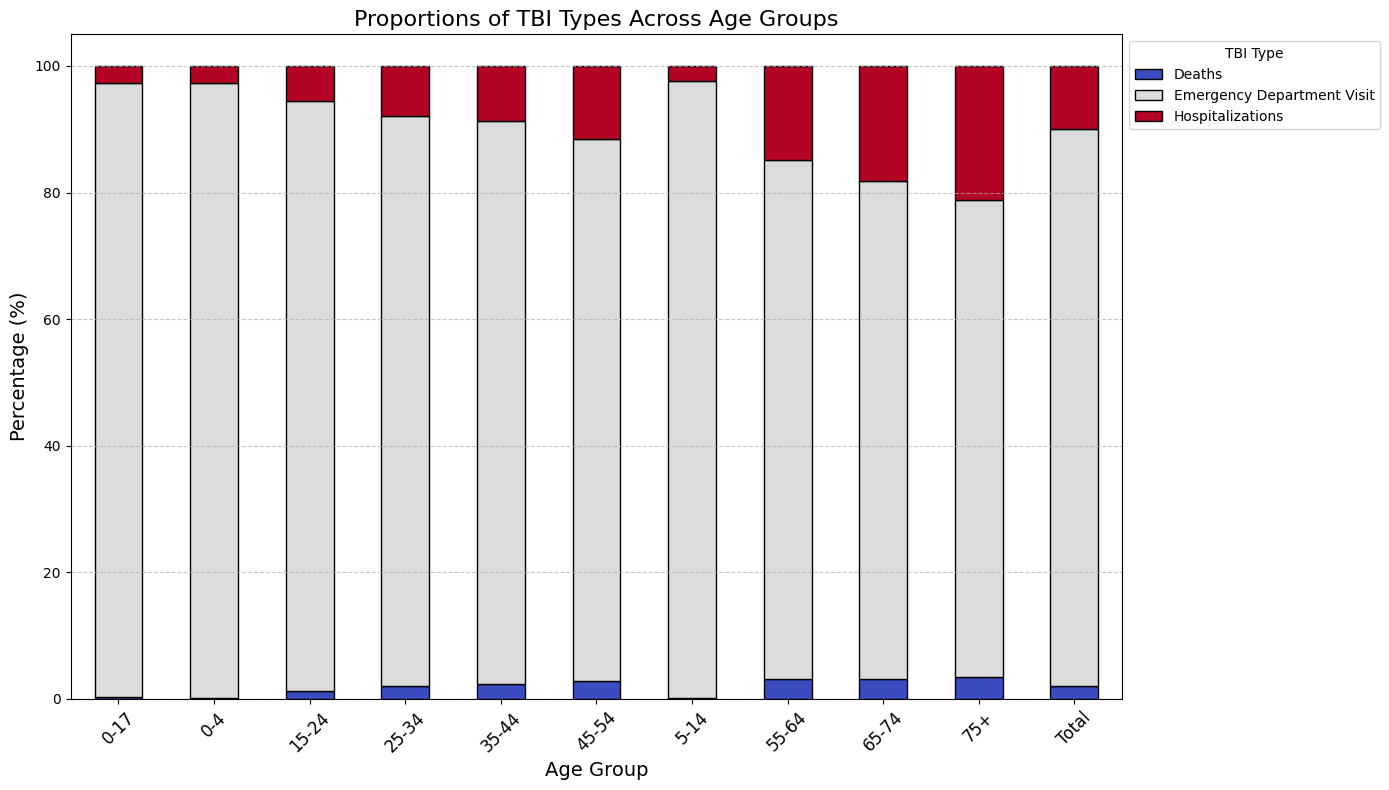

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate proportions of TBI types across age groups
proportions_by_age_type = (
    age.groupby(['age_group', 'type'])['number_est']
    .sum()
    .unstack()
    .div(age.groupby('age_group')['number_est'].sum(), axis=0) * 100
)

# Plot a stacked percentage bar chart
proportions_by_age_type.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="coolwarm", edgecolor='black')
plt.title('Proportions of TBI Types Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='TBI Type', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Insights:**

* Emergency Department Visits:
Dominate across all age groups, representing the majority of cases.
Proportionally highest in younger (0-17) and older (75+) age groups.

* Hospitalizations:
Significant for middle-aged groups (e.g., 25-64), though they account for a smaller percentage compared to Emergency Department Visits.

* Deaths:
 A small but notable proportion, particularly visible in older age groups (65+).

<ipython-input-5-fa0d5a5b9722>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-5-fa0d5a5b9722>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


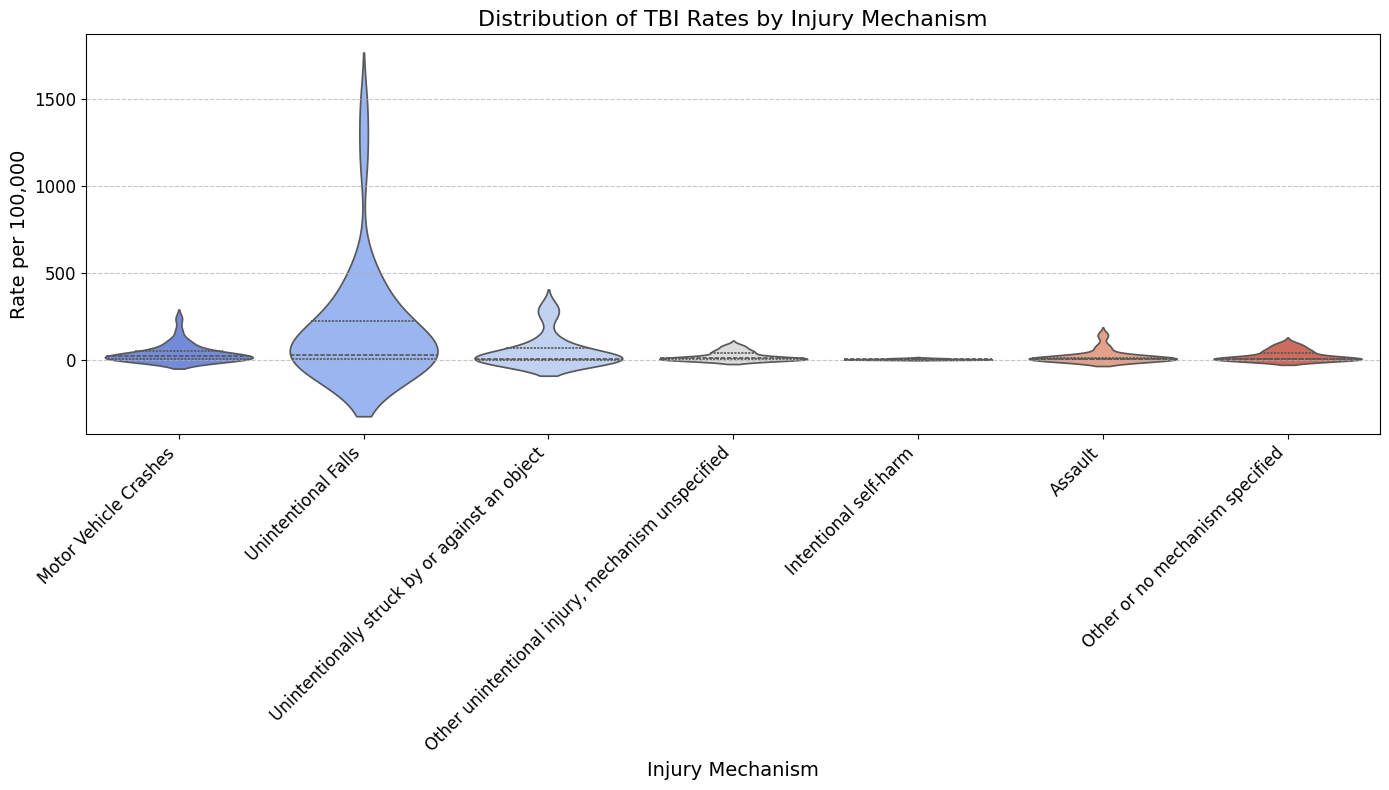

In [5]:
# Create a violin plot for `rate_est` by injury mechanism
plt.figure(figsize=(14, 8))
sns.violinplot(
    data= age,
    x="injury_mechanism",
    y="rate_est",
    inner="quartile",
    scale="width",
    palette="coolwarm"
)

# Customize the plot
plt.title("Distribution of TBI Rates by Injury Mechanism", fontsize=16)
plt.xlabel("Injury Mechanism", fontsize=14)
plt.ylabel("Rate per 100,000", fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha="right")
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insights:**

**Unintentional Falls** have the highest spread of rates, indicating their dominance across multiple cases.

**Motor Vehicle Crashes and Unintentionally Struck by or Against an Object** show moderate variability.

**Self-Harm and Assault** have consistently low rates with minimal spread.

*b) Analysis of  the demographics based on the **tbi_year**
dataset*

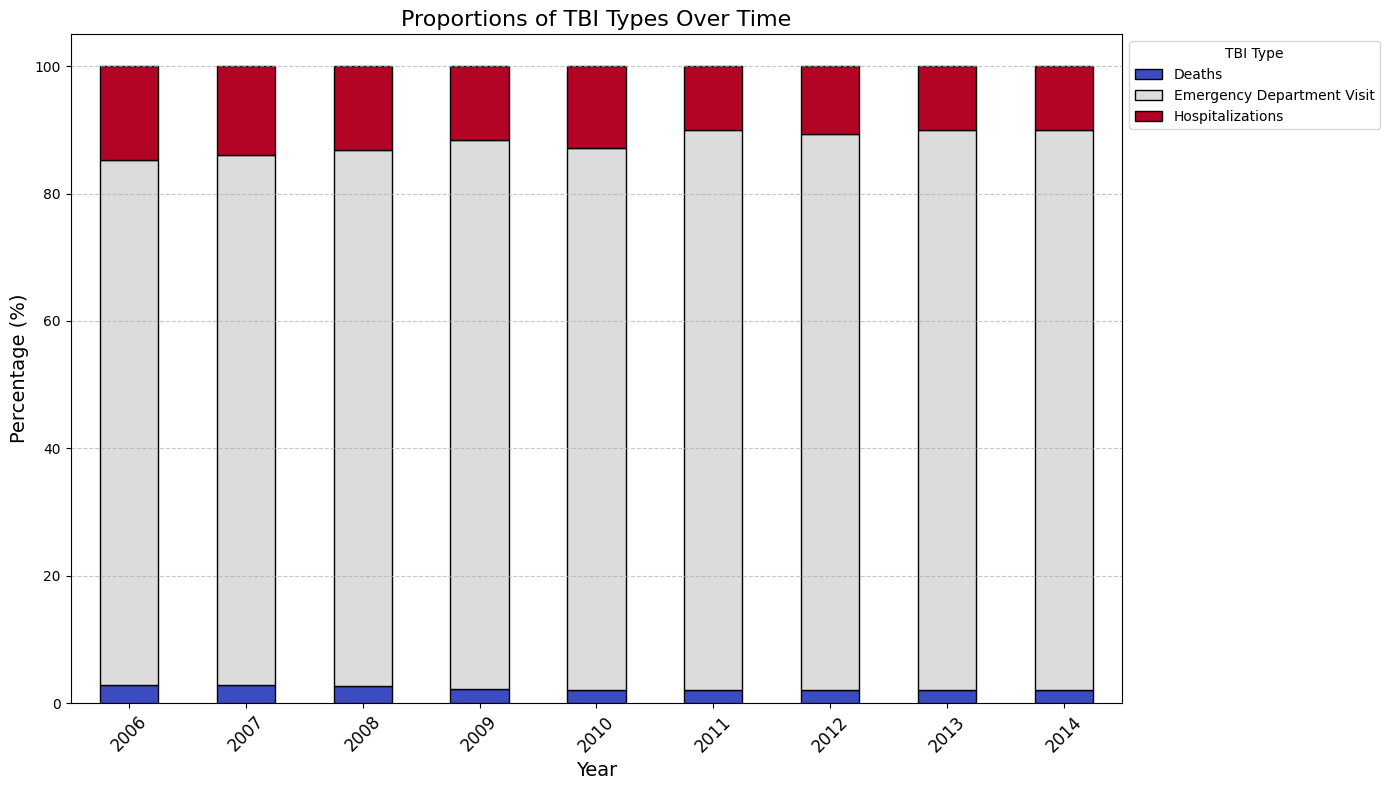

In [7]:
# Calculate proportions of TBI types over time
proportions_by_year_type = (
    year.groupby(['year', 'type'])['number_est']
    .sum()
    .unstack()
    .div(year.groupby('year')['number_est'].sum(), axis=0) * 100
)

# Plot a stacked percentage bar chart
proportions_by_year_type.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="coolwarm", edgecolor='black')
plt.title('Proportions of TBI Types Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='TBI Type', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


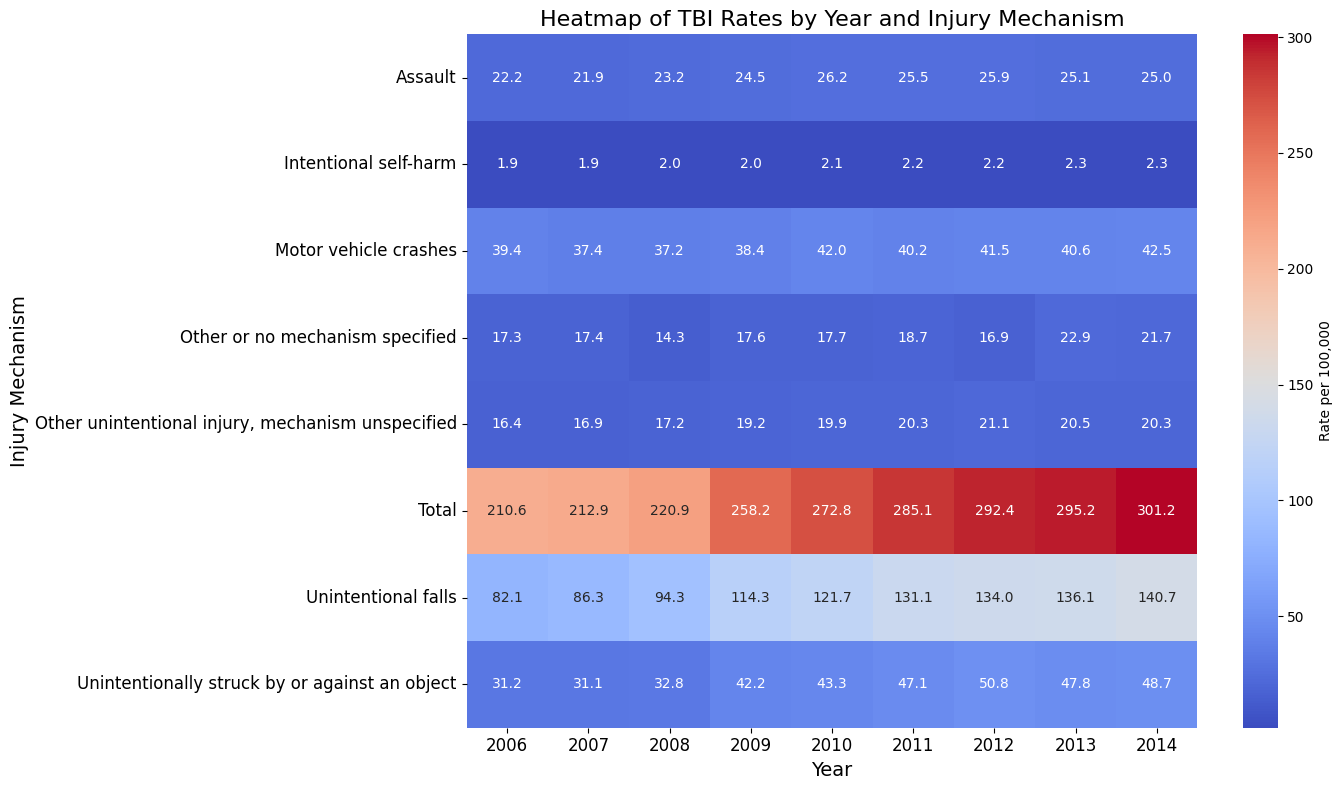

In [11]:
# Pivot the data to prepare for heatmap plotting
heatmap_data = year.pivot_table(
    index="injury_mechanism", columns="year", values="rate_est", aggfunc="mean"
)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    cbar_kws={"label": "Rate per 100,000"}
)

# Customize the heatmap
plt.title("Heatmap of TBI Rates by Year and Injury Mechanism", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Injury Mechanism", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()


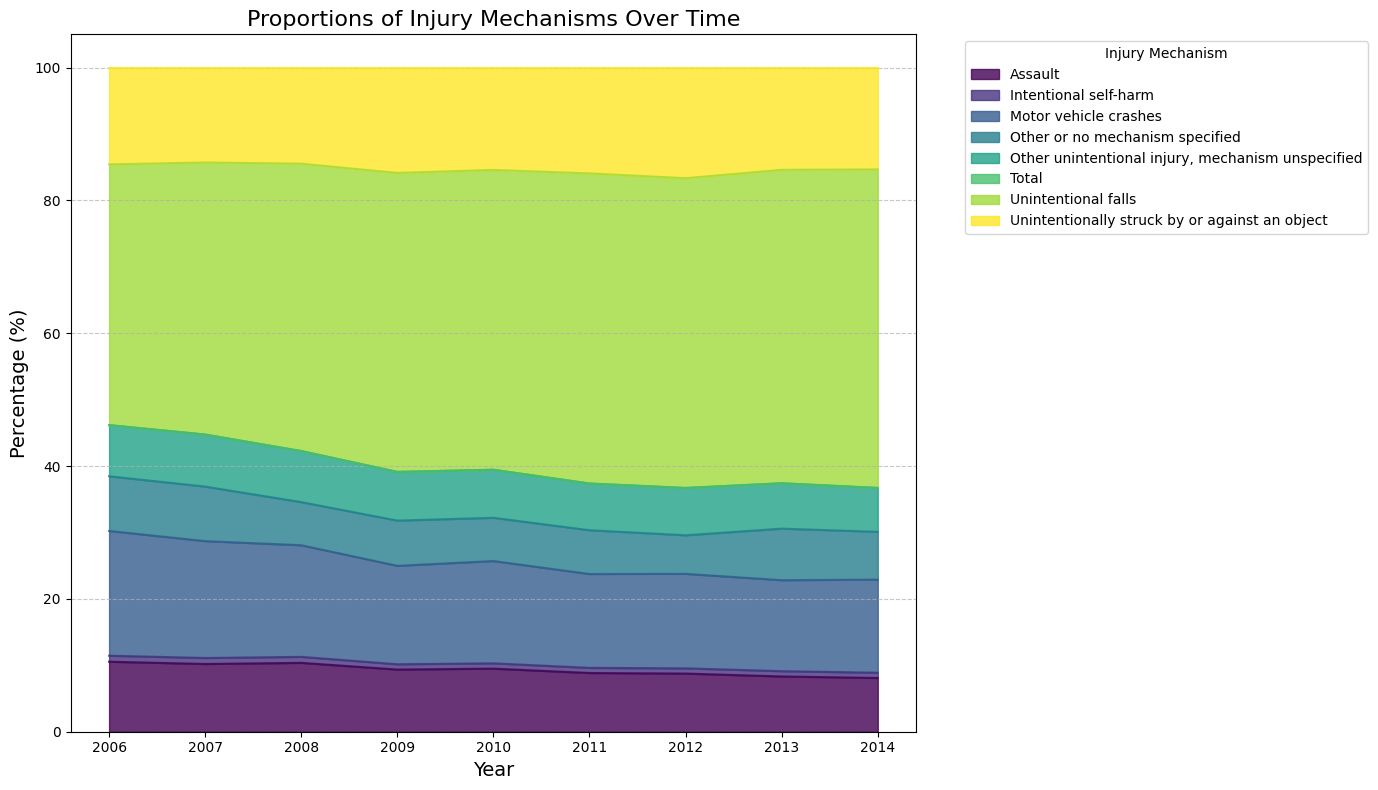

In [10]:
# Normalize the data to visualize proportions of mechanisms over time
proportions_mechanism = mechanism_pivot.div(mechanism_pivot.sum(axis=1), axis=0) * 100

# Plot the stacked area chart for proportions
proportions_mechanism.plot.area(alpha=0.8, figsize=(14, 8), colormap="viridis")
plt.title("Proportions of Injury Mechanisms Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.legend(title="Injury Mechanism", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Observations:**
* Unintentional Falls:
Their proportion has steadily increased over the years, dominating the total contribution in later years.
* Motor Vehicle Crashes:
Once a major contributor, their proportion has slightly decreased over time.
* Unintentionally Struck by or Against an Object:
Shows a gradual increase but remains secondary compared to falls and crashes.
* Other Mechanisms:
Intentional self-harm and assault consistently contribute smaller proportions.








*c) Military specific Analysis based on **tbi_military** dataset*

 The following data that we have are the total recruitment numbers for each branch of the U.S. military from 2006 to 2014:

* Army: 4,849,638
* Navy: 3,010,086
* Marine Corps: 1,738,625
* Air Force: 2,987,583

NB: It's important to note that these figures represent the total number of personnel serving in each branch for each year, not the number of new recruits.

In [21]:
# Aggregating total injuries by service branch
military_service_data = military.groupby('service').agg({
    'diagnosed': 'sum'
}).reset_index()

# Sorting the data in ascending order by diagnosed injuries
military_service_data = military_service_data.sort_values(by='diagnosed', ascending=True)

# Displaying the table instead of the plot
print("Total Diagnosed Injuries by Service Branch", military_service_data)


Total Diagnosed Injuries by Service Branch      service  diagnosed
3       Navy    27125.0
0  Air Force    29077.0
2    Marines    33817.0
1       Army   152981.0


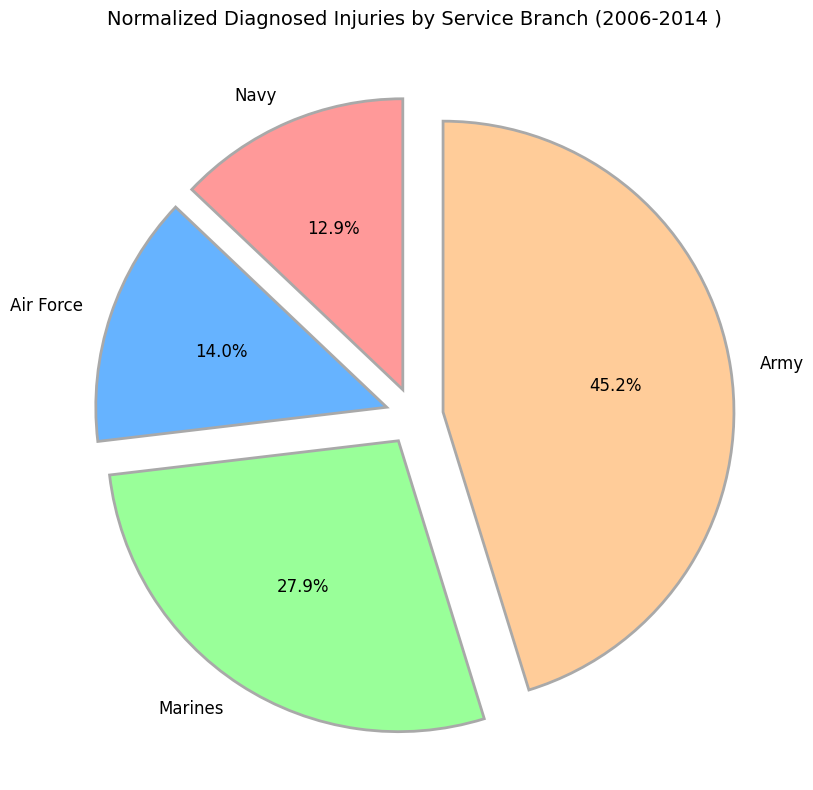

In [25]:
import matplotlib.pyplot as plt

# Recruitment numbers for normalization
recruitment_numbers = {
    "Army": 4849638,
    "Navy": 3010086,
    "Marines": 1738625,
    "Air Force": 2987583
}

# Adding recruitment data to the DataFrame for normalization
military_service_data['recruited'] = military_service_data['service'].map(recruitment_numbers)

# Normalizing diagnosed injuries by recruitment numbers
military_service_data['diagnosed_per_1000'] = (military_service_data['diagnosed'] / military_service_data['recruited']) * 1000

# Plotting a pie chart of normalized injuries(2D pie chart with simulated 3D appearance)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    military_service_data['diagnosed_per_1000'],
    labels=military_service_data['service'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0.1, 0.1, 0.1),  # Explosion for 3D effect
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],
    wedgeprops={"edgecolor": "black", "linewidth": 1}
)

# Adding shadows for a 3D-like effect
for wedge in wedges:
    wedge.set_linewidth(2)
    wedge.set_edgecolor("darkgrey")

# Customizing text and labels
for autotext in autotexts:
    autotext.set_color("black")
    autotext.set_fontsize(12)
for text in texts:
    text.set_fontsize(12)

# Adding title and final adjustments
ax.set_title("Normalized Diagnosed Injuries by Service Branch (2006-2014 )", fontsize=14, pad=20)
plt.tight_layout()
plt.show()



**Observations:**

* Marines:
Highest proportion of diagnosed injuries relative to recruitment numbers, indicating higher risk or exposure.
* Army:
While the Army has the most diagnosed injuries in absolute numbers, its proportion is moderated due to a larger recruitment base.
* Navy and Air Force:
Lower proportions, reflecting relatively fewer diagnosed injuries per 1,000 recruits.

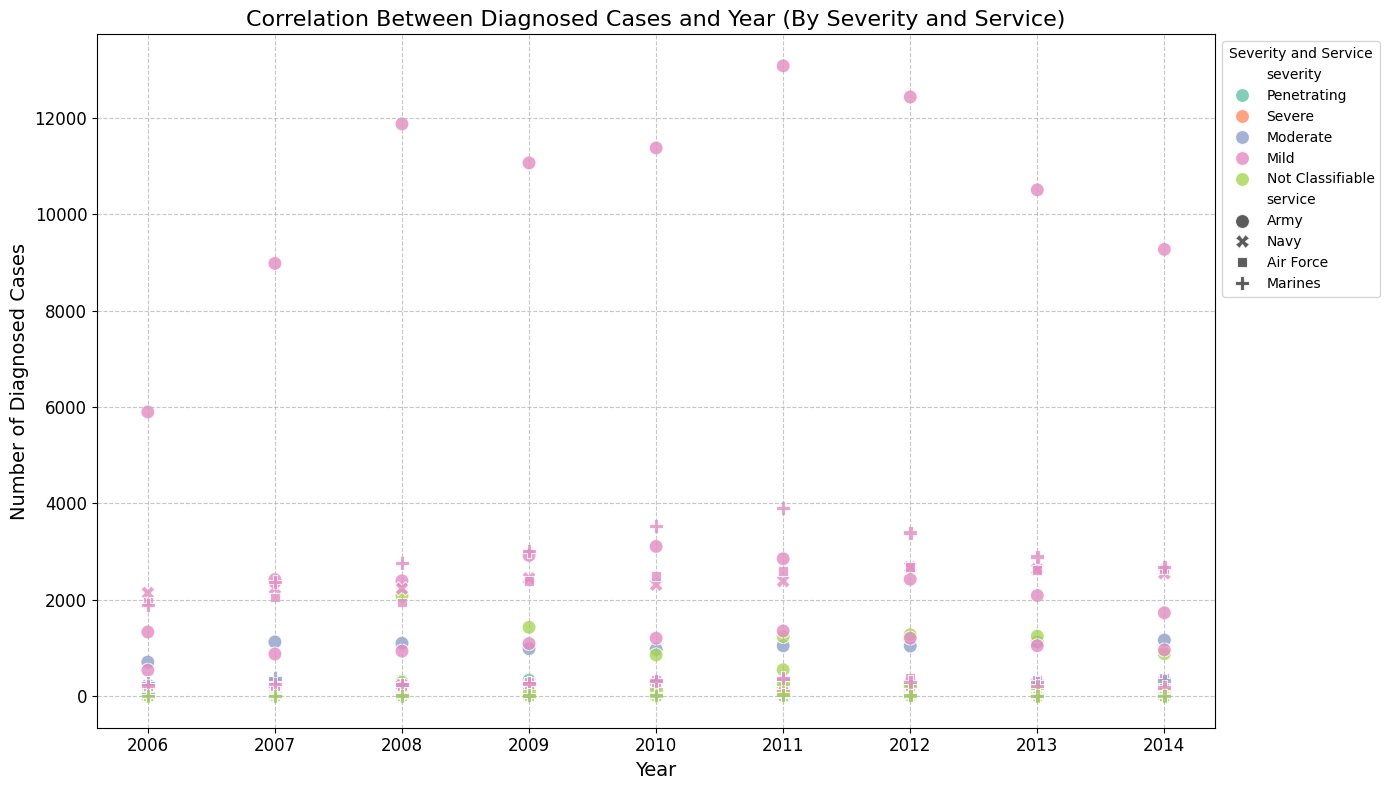

In [27]:
#Plot showing "Correlation Between Diagnosed Cases and Year (By Severity and Service)

# Scatter plot to explore the correlation between diagnosed cases and year, color-coded by severity
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data= military,
    x="year",
    y="diagnosed",
    hue="severity",
    style="service",
    s=100,  # Marker size
    alpha=0.8,
    palette="Set2"
)

# Customize the plot
plt.title("Correlation Between Diagnosed Cases and Year (By Severity and Service)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Diagnosed Cases", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Severity and Service", fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



**Observations:**
* Severity Distribution:
Mild injuries dominate across all years, reflected in the larger clusters.
Other severities (Moderate, Severe, Penetrating) show fewer cases but consistent presence.
* Trends Over Time:
Diagnosed cases are relatively stable for all severities, with some fluctuations.
* Service Branch Influence:
The Army contributes the most across all severities, followed by other branches with smaller case counts.

**Insights:**

**Mild** injuries are the primary driver of diagnosed cases, indicating the need for targeted interventions.
Stable trends suggest consistent reporting, though branch-level or severity-level changes might warrant further study.